# **Final Exam - EE4371**

**Name:** Akash Reddy A <br>
**Roll Number:** EE17B001 <br>
**Date:** Dec 15, 2020 <br>

## **Question 1** ##

### **The Birthday Paradox**

- The birthday paradox refers to the "paradoxical" phenomenon associated with the probability of atleast a pair of people (out of $n$ people) having the same birthday.
- The "paradoxical" phenomenon is that this probability reaches 100% when the number of people reaches 366 (365 possible birthdays - **assumption:** no birthdays can happen on Feb 29) by the pigeonhole principle. However, this probability reaches 99.9% when the number of people is just 70, and 50% with just 23 people. This is extremely counter-intuitive and is what is referred to as the "paradox".
- Mathematically, we can calculate this value as the complement of the probability of all birthdays being unique.
- The probability of all birthdays being unique is given by:
\begin{align}
    P(\text{unique birthdays}) & = \frac{\text{No. of ways of choosing n unique birthdays}}{\text{No. of possible combinations of n birthdays}} \\
    & = \frac{_{365}C_{n}}{365^n}
\end{align}
- Therefore, the probability of some pair of people having the same birthday $ = 1 - \frac{_{365}C_{n}}{365^n}$. Applying this formula results in the "paradoxical" effect as discussed above.

In [77]:
# Importing Required Packages
from random import choices
import matplotlib.pyplot as plt
import numpy as np

from math import factorial

def permutation(d, n):
    # Floor division used to prevent overflow from division for large integers
    return factorial(d)//factorial(d-n)                     

# Probability is estimated by taking the fraction of occurrence of 
# common birthdays in 20000 sampled sequences of n birthdays
samples = 20000

xaxis_sim = []

# List to store values of experimental probabilities from simulation
yaxis_sim = []

# List to store the theoretical/expected/calculated probabilities
yaxis_exp = []                                             

# Variable to store the sum of squared errors (L2 error) between 
# simulated and theoretical probabilities
net_error = 0                                              

for n in range(5, 201, 5):
    count = 0
    for i in range(samples):
        # Generating a sequence of sampled birthdays (from 365 days of the year)
        # with replacement
        bdays = np.random.randint(1, 365, size = n)   

        # count incremented each time the sequence of birthdays has more 
        # elements than number of unique elements 
        # (i.e, there is atleast 1 repeated birthday)
        if len(bdays) != len(set(bdays)):                  
            count +=1
    # Calculation of empirical / simulated probability
    prob = count/samples                           
    
    xaxis_sim.append(n)
    # Appending simulated probability
    yaxis_sim.append(prob)

    # Calculation of expected probability
    calc_prob = 1 - permutation(365, n)/365**n

    # Appending expected probability
    yaxis_exp.append(calc_prob)     

    # Accumulating squared error
    net_error += (prob-calc_prob)**2

Sum squared error =  9.146018115330515e-05


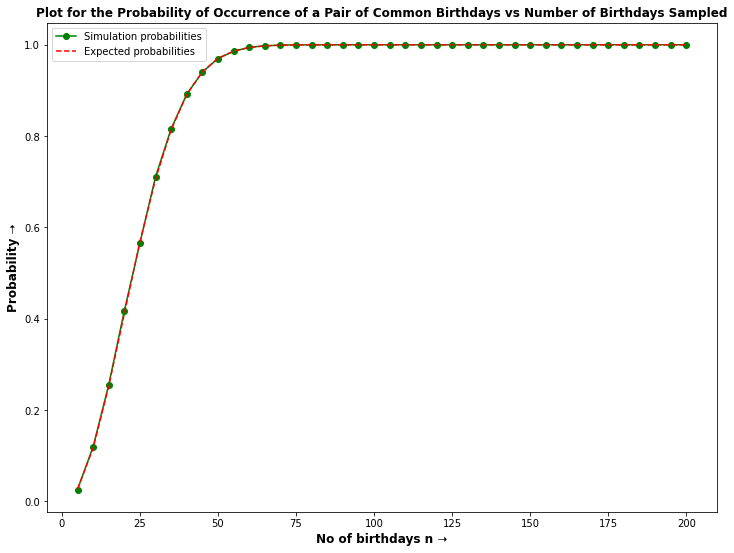

In [78]:
# Printing sum squared error to console
print("Sum squared error = ", net_error) 

# Plotting the expected and simulation curves for n = 5, 10, 15 ... 200
plt.figure(figsize = (12,9))
plt.plot(xaxis_sim, yaxis_sim, 'go-', label = "Simulation probabilities")
plt.plot(xaxis_sim, yaxis_exp, 'r--', label = "Expected probabilities")
plt.xlabel("No of birthdays n \u279d", fontsize = 12, fontweight = 'bold')
plt.ylabel("Probability \u279d",  fontsize = 12, fontweight = 'bold')
plt.title("Plot for the Probability of Occurrence of a Pair of Common Birthdays vs Number of Birthdays Sampled", 
            fontsize = 12, fontweight = 'bold')
plt.legend()
plt.show()

# We observe that both plots nearly match - verifying the truth of the
# birthday paradox.

# The sum squared error between the vectors of probabilities is very small.

In [86]:
# Formatted printing of table of simulated and expected probabilities
print("n \t | \t Simulated Probabilites \t| \t Expected Probabilites")
print("-----------------------------------------------------------------------")
for ind, elm in enumerate(xaxis_sim):
    if yaxis_sim[ind] < 1:
        print(elm, f"\t | \t {yaxis_sim[ind]} \t \t \t| \t {yaxis_exp[ind]}")
    else:
        print(elm, f"\t | \t {yaxis_sim[ind]} \t \t \t \t| \t {yaxis_exp[ind]}")

# We observe that the values of simulated and expected probabilities
# agree upto a small threshold.

n 	 | 	 Simulated Probabilites 	| 	 Expected Probabilites
-----------------------------------------------------------------------
5 	 | 	 0.0261 	 	 	| 	 0.02713557369979358
10 	 | 	 0.1199 	 	 	| 	 0.11694817771107768
15 	 | 	 0.2556 	 	 	| 	 0.25290131976368635
20 	 | 	 0.4177 	 	 	| 	 0.41143838358057994
25 	 | 	 0.5663 	 	 	| 	 0.5686997039694639
30 	 | 	 0.71125 	 	 	| 	 0.7063162427192686
35 	 | 	 0.81625 	 	 	| 	 0.8143832388747152
40 	 | 	 0.8918 	 	 	| 	 0.891231809817949
45 	 | 	 0.94025 	 	 	| 	 0.940975899465775
50 	 | 	 0.96985 	 	 	| 	 0.9703735795779884
55 	 | 	 0.9857 	 	 	| 	 0.9862622888164461
60 	 | 	 0.99445 	 	 	| 	 0.994122660865348
65 	 | 	 0.9978 	 	 	| 	 0.9976831073124921
70 	 | 	 0.9993 	 	 	| 	 0.9991595759651571
75 	 | 	 0.99985 	 	 	| 	 0.9997198781738114
80 	 | 	 0.9999 	 	 	| 	 0.9999143319493135
85 	 | 	 0.99995 	 	 	| 	 0.9999759973260097
90 	 | 	 1.0 	 	 	 	| 	 0.9999938483561236
95 	 | 	 1.0 	 	 	 	| 	 0.9999985601708488
100 	 | 	 1.0 	 	 	 	| 	 0.99

____________________________________________________________________

## **Question 2** ##

*(a)* $f(n) = n-100$, $g(n) = n-200$

Checking for $O$:

For $c=2$ and $n_0=300$,

\begin{align}
f(n) &\leq c(g(n)) \\
n-100 &\leq 2(n-200)\\
n &\geq 300
\end{align}
which is true for $n\geq n_o$ when $n_0 = 300$.

**Therefore,** $f(n) = O(g(n))$.

Checking for $\Omega$:

For $c=1$ and $n_0=100$,

\begin{align}
f(n) &\geq c(g(n)) \\
n-100 &\geq n-200\\
\end{align}
which is true for $n\geq n_o$ when $n_0 = 100$.

**Therefore,** $f(n) = \Omega(g(n))$.

**Since both $f(n) = O(g(n))$ and $f(n) = \Omega(g(n))$ hold true, $f(n) = \Theta(g(n))$**.

-------------------------------------------------------------------------------





*(b)* $f(n) = 100n+\log n$, $g(n) = n + (\log n)^2$

Checking for $O$:

For $c=2$ and $n_0=300$,

\begin{align}
f(n) &\leq c(g(n)) \\
100n+\log n &\leq c(n + (\log n)^2)\\
(100-c)n &\leq c(\log n)^2 - \log n\\
\end{align}
Putting $n = 2^k$

\begin{align}
(100-c)2^k &\leq ck^2 - k
\end{align}
which is true when $LHS < 0$ and $RHS > 0$, i.e., when $c \geq 100$ and $n\geq n_o$ for $n_0 > 2$. (LHS becomes $<0$ but RHS remains $>0$ for $n>2$).
Therefore, for $n_0 = 3$ and $c=100$, the inequality is satisfied.

**Therefore,** $f(n) = O(g(n))$.

Checking for $\Omega$:

For $c=1$ and $n_0=1$,

\begin{align}
f(n) &\geq c(g(n)) \\
100n+\log n &\geq c(n + (\log n)^2)\\
(100-c)n &\geq c(\log n)^2 - \log n\\
\end{align}
Putting $n = 2^k$

\begin{align}
(100-c)2^k &\geq ck^2 - k
\end{align}
which is true whenever $LHS > 0$ since it is exponential. Therefore, $c < 100$ must hold. 

There exist values $c = 1$ and $n_0 = 3$ for which inequality holds for all $n>n_0$.

**Therefore,** $f(n) = \Omega(g(n))$.

**Since both $f(n) = O(g(n))$ and $f(n) = \Omega(g(n))$ hold true, $f(n) = \Theta(g(n))$**.

------------------------------------------------------------------------------------------------




(c) $f(n) = \log 2n$, $g(n) = \log 3n$

Checking for $O$:

For $c=1$ and $n_0=1$,

\begin{align}
f(n) &\leq c(g(n)) \\
\log 2n &\leq \log 3n\\
\log (\frac{2}{3}) &\leq 0
\end{align}
always holds for all $n \geq n_0$. 

**Therefore,** $f(n) = O(g(n))$.

Checking for $\Omega$:

 Assuming there exist $c$ and $n_0$ such that:

\begin{align}
f(n) &\geq c(g(n)) \\
\log 2n &\geq c\log 3n\\
(1-c)\log n &\geq c\log 3 - \log 2
\end{align}
which is true for $n\geq n_o$ when $n_0 = 100$.

For $c<\frac{\log 2}{\log 3}$, $RHS$ becomes negative, while $LHS$ remains positive for n>1.

$\implies$ for $c=0.5$ and $n_0 = 2$ for example, the inequality holds.

**Therefore,** $f(n) = \Omega(g(n))$.

**Since both $f(n) = O(g(n))$ and $f(n) = \Omega(g(n))$ hold true, $f(n) = \Theta(g(n))$**.

-------------------------------------------------------------------------------

(d) $f(n) = n2^n$, $g(n) = 3^n$

Checking for $O$:

\begin{align}
f(n) &\leq c(g(n)) \\
n2^n &\leq c3^n\\
n(\frac{2}{3})^n &\leq c
\end{align}
Taking $\log$ on both sides and $c=1$,

\begin{align}
\log n + n\log(\frac{2}{3}) & \leq \log 1\\
\log n - 0.584n & \leq 0\\
n & \geq \frac{\log n}{0.584}
\end{align}
which holds $\forall n > 0$.

Therefore, $f(n) \leq c(g(n))$ holds for $c = 1$ and $\forall n > n_0 = 1$ (say).

$\implies f(n) = O(g(n))$.
<br><br>
Checking for $\Omega$:

\begin{align}
f(n) &\geq c(g(n)) \\
n2^n &\geq c3^n\\
n(\frac{2}{3})^n &\geq c
\end{align}

Taking $\log$ on both sides and any value of $c > 0$,
\begin{align}
\log n + n\log(\frac{2}{3}) & \geq \log c\\
\log n - 0.584n & \geq \log c\\
n & \leq \frac{\log n}{0.584} - k
\end{align}
which can never hold true as $n\rightarrow \infty$, whatever finite value $k$ may assume (even if it is a large negative value). This is because the linear $LHS$ will necessarily grow to be larger than the logarithmic $RHS$.

Therefore, there can be no value of $n_0$ for which $f(n) \geq c(g(n))$ holds $\forall n > n_0$.

$\implies f(n) \neq \Omega(g(n))$.

**Therefore,** $f(n) = O(g(n))$.





-------------------------------------------------------------------------------

## **Question 3**

Let $T(n)$ be the time taken by the merge sort algorithm.

In general, at each split, the subarrays are divided into size $\lfloor n/2 \rfloor$ and $\lceil n/2 \rceil$. The relationship between the times taken for the parent array and the subarrays in the next level of the recursion tree is:

\begin{equation}
    T(n) = T(\lfloor n/2 \rfloor) + T(\lceil n/2 \rceil) + cn
\end{equation}

where c is some positive constant (the term that accounts for the comparisons that occur during merging).

We can use mathematical induction to show that $T(n) = O(n\log n)$ or equivalently, $T(n) < kn\log n$. 

Let us assume that $\forall i < n$, $T(i) < ki\log i$. We show that it is true for $i =  n$ as well. Substituting this assumption in the above equation,

\begin{equation}
    T(n) = T(\lfloor n/2 \rfloor) + T(\lceil n/2 \rceil) + cn < k\lfloor n/2 \rfloor \log(\lfloor n/2 \rfloor) + k\lceil n/2 \rceil \log(\lceil n/2 \rceil) + cn
\end{equation}

Since $\lfloor n/2 \rfloor < \lceil n/2 \rceil$,

\begin{align}
    T(n) &< k\lfloor n/2 \rfloor \log(\lceil n/2 \rceil) + k\lceil n/2 \rceil \log(\lceil n/2 \rceil) + cn \\
    &< kn\log(\lceil n/2 \rceil) + cn
\end{align}

For large values of $n$ (in fact, for any $n$ > 1), we have $\lceil n/2 \rceil < an$ where $0.5 < a < 1$.

Therefore, 
\begin{align}
    T(n) &< kn\log(an) + cn \\
        &< kn\log(n) + [c - k\log(1/a)]n
\end{align}

If $k$ is chosen such that $[c - k\log(1/a)] < 0$, then

\begin{equation}
    T(n) < kn\log(n)
\end{equation}
holds. 

Equivalently,
\begin{equation}
    T(n) = O(n\log(n))
\end{equation}
holds. 





____________________________________________________________________

## **Question 4** ##


The stack implementation using 2 queues can be done as follows:
- Let the two queues be $q1$ and $q2$.
- **PUSH operation:**
  - Simply enqueue the element to be pushed into queue $q1$.
  - **Timing analysis:** $1$ element is pushed into the queue. 

    Therefore, time complexity = $O(1)$
- **POP operation:**
  - Since we need access to the most recently pushed element (as in a stack), we dequeue elements one-by-one from the head of the queue $q1$, and enqueue them into the other queue $q2$ until we reach the last element in $q1$.
  - When $q1$ has no more elements left, this last element which we have dequeued is the popped element that we need to return, and it is *NOT* enqueued into $q2$ as the POP operation **removes** the last-in element.
  - $q1$ and $q2$ are interchanged, so that the subsequent PUSH, POP, and TOP operations occur on the queue which has the elements (since all the elements have been moved into $q2$).
  - Therefore, the older $q2$ is henceforth $q1$, and the older $q1$ is henceforth $q2$.
  - **Timing analysis:** $n-1$ elements are dequeued from $q1$ and enqueued into $q2$, where $n$ is the length of the queue $q1$ or the number of elements currently in the stack. This is an $O(2(n-1))$ operation. Finally, dequeueing the last element is an $O(1)$ operation. 
  
    Therefore, total time complexity = $O(2(n-1) + 1) = O(2n-1) = O(2n) = O(n)$
- **TOP operation:**
  - Exactly the same as the POP operation, except that the last element which is dequeued from $q1$ is returned *AND* enqueued into $q2$ without being discarded.
  - This is because the TOP operation **does not remove** the last-in element of the stack.
  - **Timing analysis:** Similar to the POP operation, $n-1$ elements are dequeued from $q1$ and enqueued into $q2$, where $n$ is the length of the stack. This is an $O(2(n-1))$ operation. Finally, dequeueing the last element is an $O(1)$ operation, and enqueueing it into $q2$ is another $O(1)$ operation. 
  
    Therefore, total time complexity = $O(2(n-1) + 1 + 1) = O(2n) = O(n)$


Let us demonstrate this algorithm with an example sequence of operations for easier understanding.

1. **PUSH 4:** Let us first PUSH **4** into the stack as above (goes into $q1$). <br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
</table>
</div>
<br>
2. **PUSH 5:** Next we PUSH **5** into the stack (enqueues into $q1$). <br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>5</td>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
</table>
</div>
<br>
3. **PUSH 6:** Next we PUSH **6** into the stack (enqueues into $q1$). <br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>6</td>
            <td>5</td>
            <td>4</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
</table>
</div>
<br>
4. **TOP:** The steps described above for the TOP operation are taken (all elements enqueued one-by-one into $q2$ and last element returned, and then the queues are interchanged). <br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>6</td>
            <td>5</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
</table>
</div>
<br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>6</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>5</td>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
</table>
</div>
<br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td><b>6</b></td>
            <td>5</td>
            <td>4</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
</table>
</div>
<br>
<div>
<b>6</b> is returned as the top element and the queues are interchanged:
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>6</td>
            <td>5</td>
            <td>4</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q2</th>
        <td>-</td>
        <th>q1</th>
    </tr>
</table>
</div>
<br>
5. **TOP:** Once again, the TOP operation is performed to demonstrate that the TOP operation does not pop/remove an element (same top element as before is expected). <br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>6</td>
            <td>5</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q2</th>
        <td>-</td>
        <th>q1</th>
    </tr>
</table>
</div>
<br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>5</td>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>6</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q2</th>
        <td>-</td>
        <th>q1</th>
    </tr>
</table>
</div>
<br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td><b>6</b></td>
            <td>5</td>
            <td>4</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td><b>-</b></td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q2</th>
        <td>-</td>
        <th>q1</th>
    </tr>
</table>
</div>
<br>
<div>
<b>6</b> is returned as the top element and the queues are interchanged:
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>6</td>
            <td>5</td>
            <td>4</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
</table>
</div>
<br>
6. **POP:** POP operation is done as earlier described (all elements dequeued from $q1$ and enqueued into $q2$ until last element, last element popped without enqueueing into $q2$, and queues interchanged). <br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>6</td>
            <td>5</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
</table>
</div>
<br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>6</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>5</td>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
</table>
</div>
<br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>5</td>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
    <tr>
        <td><b>6</b></td>
    </tr>
</table>
</div>
<br>
<div>
<b>6</b> is popped and the queues are interchanged:
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>5</td>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q2</th>
        <td>-</td>
        <th>q1</th>
    </tr>
</table>
</div>
<br>
7. **TOP:** Now, element 5 is returned as the top element. <br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>5</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q2</th>
        <td>-</td>
        <th>q1</th>
    </tr>
</table>
</div>
<br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td><b>5</b></td>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q2</th>
        <td>-</td>
        <th>q1</th>
    </tr>
</table>
</div>
<br>
<div>
<b>5</b> is returned as the top element and the queues are interchanged:
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>5</td>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
</table>
</div>
<br>
8. **POP:** This time, element <b>5</b> is popped. <br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>5</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
</table>
</div>
<br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
    <tr>
        <td><b>5</b></td>
    </tr>
</table>
</div>
<br>
<div>
<b>5</b> is popped and the queues are interchanged:
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q2</th>
        <td>-</td>
        <th>q1</th>
    </tr>
</table>
</div>
<br>
9. **PUSH 8:** <b>8</b> is pushed into the stack (goes into the current $q1$ - not necessarily the original $q1$). <br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>8</td>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q2</th>
        <td>-</td>
        <th>q1</th>
    </tr>
</table>
</div>
<br>
10. **TOP:** Top element is returned as **8**. 
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>8</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q2</th>
        <td>-</td>
        <th>q1</th>
    </tr>
</table>
</div>
<br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td><b>8</b></td>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td><b>-</b></td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q2</th>
        <td>-</td>
        <th>q1</th>
    </tr>
</table>
</div>
<br>
<div>
<b>8</b> is returned as the top element and the queues are interchanged:
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>8</td>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
</table>
</div>
<br>
11. **POP:** **8** is popped. 
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>8</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
</table>
</div>
<br>
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
    <tr>
        <td><b>8</b></td>
    </tr>
</table>
</div>
<br>
<div>
<b>8</b> is popped and the queues are interchanged:
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>4</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q2</th>
        <td>-</td>
        <th>q1</th>
    </tr>
</table>
</div>
<br>
12. **POP:** **4** is popped. 
<div> 
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q2</th>
        <td>-</td>
        <th>q1</th>
    </tr>
    <tr>
        <td><b>4</b></td>
    </tr>
</table>
</div>
<br>
<div> 
<b>4</b> is popped and the queues are interchanged:
<table>
    <tr>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
        <th>||</th>
        <td>
        <table>
            <tr>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            <td>-</td>
            </tr>
        </table>
        </td>
    </tr>
    <tr>
        <th>q1</th>
        <td>-</td>
        <th>q2</th>
    </tr>
</table>
</div>
<br>
13. **POP:** Since the stack is empty, the user is alerted that the stack is empty and no element is returned.
<br>
14. **POP:** Once again, since the stack is empty, the user is alerted that the stack is empty and no element is returned.


<br><br>


**Below is a code implementation of this model of the two-queue stack, and its functioning demonstrated using the example discussed above.**




In [79]:
# Importing Required Packages

from queue import Queue
from queue import Empty

In [80]:
# Writing a class for our implementation of a stack

class Stack:
    def __init__(self):
        self.q1 = Queue()
        self.q2 = Queue()
        # Creating the queue pair of q1, q2
        self.queue_pair = [self.q1, self.q2]  
    
    # Function to reverse the current order of queues for POP and TOP
    def switch(self):
        self.queue_pair = list(reversed(self.queue_pair))

    # Function for the PUSH operation
    def push(self, ele):
        self.queue_pair[0].put(ele)
        # Displaying a message whenever an element is pushed
        # print("PUSH: Element pushed = ", ele)
    
    # Function for the POP operation
    def pop(self):
        while True:
            try:
                # Trying to remove and get the "head" of the current q1
                # current q1 is the queue at index 0 of the queue_pair
                elm = self.queue_pair[0].get(timeout = 0.1)

            except Empty:
                # Returning "STACK IS EMPTY" if the current q1 is empty
                return "STACK IS EMPTY!"
            
            # If the "head" of q1 was the last element of q1, break from loop
            if self.queue_pair[0].empty():
                break
            # If the "head" was NOT the last element of q1, 
            # only then enqueue into q2 (last element should be popped)
            else:
                self.queue_pair[1].put(elm)
        # Reverse order of the queues
        self.switch()
        # Return the popped element
        return elm
    
    # Function for the TOP operation
    def top(self):
        while True:
            try:
                # Trying to remove and get the "head" of the current q1
                # current q1 is the queue at index 0 of the queue_pair
                elm = self.queue_pair[0].get(timeout = 0.1)

            except Empty:
                # Returning "STACK IS EMPTY" if the current q1 is empty
                return "STACK IS EMPTY!"

            # ALWAYS enqueue into q2 (last element should not be popped)
            self.queue_pair[1].put(elm)
            # If the "head" of q1 was the last element of q1, break from loop
            if self.queue_pair[0].empty():
                break
        # Reverse order of the queues
        self.switch()
        # Return the top element of the stack
        return elm
            

In [81]:
# DEMONSTRATION OF THE STACK IMPLEMENTATION USING SOME OPERATIONS

stack = Stack()

stack.push(4)           # PUSH 4
stack.push(5)           # PUSH 5
stack.push(6)           # PUSH 6

print()    # Empty prints to print empty lines and make the output easy to read
print("TOP: Top element (peek) =", stack.top())  # TOP: Should show top element 6
print("TOP: Top element (peek) =", stack.top())  # TOP: Should still show top 
                                                 # element (6) without popping
print()
print("POP: Popped element =", stack.pop())      # POP: Should pop 6
print("TOP: Top element (peek) =", stack.top())  # TOP: Top element must now be 5
print("POP: Popped element =", stack.pop())      # POP: Should pop 5
print()

stack.push(8)           # PUSH 8
 
print()
print("TOP: Top element (peek) =", stack.top())  # TOP: Top element must now be 8
print()
print("POP: Popped element =", stack.pop())      # POP: Should pop 8
print("POP: Popped element =", stack.pop())      # POP: Should pop 4
print()
print("POP:", stack.pop())                      # POP: Should say 'STACK IS EMPTY!'
print("POP:", stack.pop())                      # POP: Should say 'STACK IS EMPTY!'


TOP: Top element (peek) = 6
TOP: Top element (peek) = 6

POP: Popped element = 6
TOP: Top element (peek) = 5
POP: Popped element = 5


TOP: Top element (peek) = 8

POP: Popped element = 8
POP: Popped element = 4

POP: STACK IS EMPTY!
POP: STACK IS EMPTY!


____________________________________________________________________________________________________

## **Question 5**

- In order to remove all duplicates from an array in time $O(n\log n)$, we can use a de-duplication algorithm based on MergeSort, which is also an algorithm of complexity $O(n\log n)$.
- The sorting of the arrays that happens, allows for easy $O(1)$ checking of duplicates, since the sorted array will have duplicates next to each other.
- In order to de-duplicate an array using the MergeSort algorithm as a basis, the steps followed are the same as MergeSort **with one key modification.**

The entire algorithm to de-duplicate an array using the MergeSort algorithm as a basis is as described below:
- If length of array is 1, do not do anything. This subarray of length 1 will be sorted during the merging process.
- Calculate $mid = \lfloor\frac{n+1}{2}\rfloor$.
- Divide the original array $arr$ of length $n$ into two halves: left half $arr[0:mid]$ and right half $arr[mid:-1]$.
- Recursively sort the subarray $arr[0:mid]$.
- Recursively sort the subarray $arr[mid:-1]$.
- Merge the two sorted subarrays $arr[0:mid]$ and $arr[mid:-1]$ into a sorted parent subarray $arr[0:-1]$, **while discarding every element about to be added if it is equal to the last element in the parent subarray**. 

  During this merging in regular MergeSort, the currently selected element of the left sorted subarray is compared with the currently selected element of the right sorted subarray and the minimum of the two is appended to the parent subarray. The current index of the respective subarray is incremented. This process is repeated until one of the two subarrays is empty, and the remaining elements of the other subarray are appended as is. This is how we obtain the final parent subarray at each level of MergeSort.

  The modification we will make is: **Only if the current element about to be added to the parent subarray is NOT EQUAL TO the current last element in the parent subarray, it is appended to the parent subarray. Else it will be discarded instead of being appended to the parent subarray as in the case of regular MergeSort.** This will remove duplicates as we go through the array and sort it at all levels.

The complexity of this algorithm will be the same as MergeSort, which has a complexity of $O(n\log n)$ - the recursion consists of $O(\log n)$ levels, and the processing at each level is $O(n)$. 

This de-duplication algorithm only has an additional $O(1)$ comparison to the last element in the parent subarray to be made at every iteration of processing, which will mean that the total processing time is $O(n) + O(n)\cdot O(1)$ which is still $O(n)$ time for the processing at each level.

**Therefore, the total complexity of this de-duplication algorithm is $O(n\log n)$.**
<br><br>
This algorithm has been implemented in code below.


In [82]:
# Function to merge the two halves of a subarray, in sorted fashion
# This function is modified to also avoid appending if element is a duplicate

def merge(L, R):
    
    # Lengths of left and right halves
    n1 = len(L)
    n2 = len(R)

    i = 0     # Initial index of left subarray 
    j = 0     # Initial index of right subarray
  
    merged_seq = []     # List to store and return the merged array

    """Iterating through both subarrays (depending on which element is added to 
    merged array) until one is empty"""
    while i < n1 and j < n2 :
        if L[i] <= R[j]:   # If left subarray has smaller/equal current element

            if len(merged_seq) == 0 or L[i] != merged_seq[-1]:
                merged_seq.append(L[i])
                # THE MODIFICATION: APPENDING ONLY IF 
                # LEFT CURRENT ELEMENT != LAST ELEMENT OF PARENT SUBARRAY
                # (Appending always if the parent subarray is currently empty)

            i += 1  # Incrementing current index of left subarray

        else:   # If right subarray has the smaller current element

            if len(merged_seq) == 0 or R[j] != merged_seq[-1]:
                merged_seq.append(R[j])
                # THE MODIFICATION: APPENDING ONLY IF 
                # RIGHT CURRENT ELEMENT != LAST ELEMENT OF PARENT SUBARRAY
                # (Appending always if the parent subarray is currently empty)

            j += 1  # Incrementing current index of right subarray

    """Once either subarray is empty, append the remaining elements of
    other subarray to parent subarray. MAKE SURE to check if each element is
    a duplicate - i.e., it is equal to the current last element of parent
    subarray - before appending."""

    while i < n1:
        if L[i] != merged_seq[-1]:
            merged_seq.append(L[i])
            # THE MODIFICATION: AGAIN, APPENDING ONLY IF 
            # LEFT CURRENT ELEMENT != LAST ELEMENT OF PARENT SUBARRAY

        i += 1  # Incrementing current index of left subarray
  
    while j < n2:
        if R[j] != merged_seq[-1]: 
            merged_seq.append(R[j])
            # THE MODIFICATION: AGAIN, APPENDING ONLY IF 
            # RIGHT CURRENT ELEMENT != LAST ELEMENT OF PARENT SUBARRAY

        j += 1   # Incrementing current index of right subarray

    return merged_seq
  
def deDuplicate(seq): 
    if len(seq) <= 1:
        return seq     # If length of subarray is 1, do nothing and return it

    mid = (len(seq)+1)//2       # Calculating middle index

    # Recursively sorting and de-duplicating left subarray 
    lhalf = deDuplicate(seq[0:mid])
    # Recursively sorting and de-duplicating right subarray    
    rhalf = deDuplicate(seq[mid:])     

    # Merging both halves to form sorted and de-duplicated parent subarray
    res = merge(lhalf, rhalf)

    return res

In [83]:
# Example to verify the program implementation of the de-duplication algorithm

arr = [12, 11, 13, 5, 6, 7, 7, 7, 23, 2, 23, 2, 22, 23, 3, 2, 17]
print("Given array is", arr)
print()
deduplicated_arr = deDuplicate(arr) 
print("De-duplicated array is", deduplicated_arr) 

Given array is [12, 11, 13, 5, 6, 7, 7, 7, 23, 2, 23, 2, 22, 23, 3, 2, 17]

De-duplicated array is [2, 3, 5, 6, 7, 11, 12, 13, 17, 22, 23]


________________________________________________________________________________________________________________

## **Question 6**

Dijkstra's Algorithm is performed as follows:

- The starting node is labelled as distance $0$, and all others begin at distance $\infty$. <br> We pick $\infty$ as the starting distance for all nodes, because it might even be possible that some nodes are unreachable from the starting node - in which case their distance remains $\infty$ even at the end of the algorithm.

- The starting node is added to a priority queue (queue which dequeues the mimimum element always).

- The distance of each neighbouring node to the starting node is updated to be equal to the **distance of current node ($0$ for the starting node) $+$ weight of the edge connecting them (path length between each pair of nodes)**. <br> These neighbouring nodes are added to the priority queue once distance is updated.

- The starting node with distance $0$ is moved to a "COMPLETED" pile, and we do not involve it in the algorithm after this.

- The node with the next smallest distance is dequeued from the priority queue, and the process of updating neighbouring nodes is repeated. Once all neighbouring nodes are updated, the current node is moved to the "COMPLETED" pile and never updated again. The next smallest node is dequeued from the priority queue and the whole process is repeated until all nodes are moved to the "COMPLETED" pile.

- Two rules to follow while updating neighbouring nodes:
 - A "COMPLETED" node is never updated, even if it is a neighbour to the currently selected node.
 - A neighbouring node which already has a certain value of distance is **not** updated, if the new value of distance evaluated using the current new path is greater than or equal to the already assigned value of distance.

Let us now follow Dijkstra's Algorithm for the given graph.

We begin with the given directed graph (neighbouring nodes = nodes that can be reached from the current node by traversing exactly one edge):

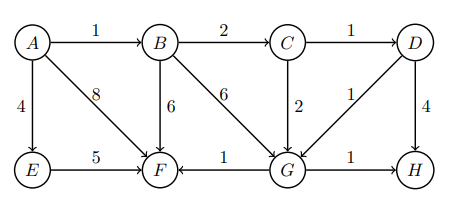

Let the: 
- <font color='33ff33'><b>green</b></font> node indicate currently selected node (dequeued from priority queue)
- <font color='ccccff'><b>light blue</b></font> nodes indicate neighbours of current node
- <font color='ffcccc'><b>light red</b></font> nodes indicate those updated atleast once
- <font color='ff9999'><b>dark red</b></font> nodes indicate those in the "COMPLETED" pile <br>

**<u>ITERATION 1:</u>** Starting node $A$ is assigned distance $0$ and the other nodes are assigned distance $\infty$. <br>
The distances of neighbouring nodes of $A$ are updated as $0 + pathlength$. <br> <br>
With this, node $A$ moves to "COMPLETED" pile, and nodes $B, E, F$ have been updated.

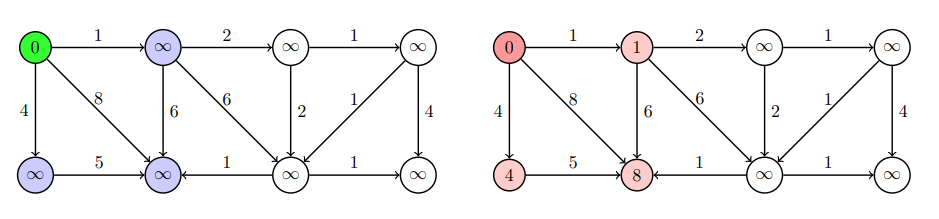

**<u>ITERATION 2:</u>** Next current node coming from the priority queue (one with minimum distance) is node $B$ with distance $1$. <br>
The distances of neighbouring nodes of $B$ are updated as $1 + pathlength$. <br> <br> **Node $F$ has to be updated** - because the new value of distance $1 + 6 = 7$ is **lesser than** its existing value of distance $8$. <br> <br>
With this, node $B$ moves to "COMPLETED" pile, and nodes $C, F, G$ have been updated.

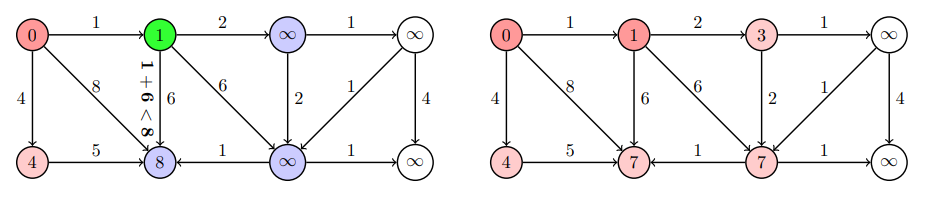

**<u>ITERATION 3:</u>** Next current node coming from the priority queue (one with minimum distance and not yet moved to the "COMPLETED" pile) is node $C$ with distance $3$. <br>
The distances of neighbouring nodes of $C$ are updated as $3 + pathlength$. <br> <br> **Node $G$ has to be updated** - because the new value of distance $3 + 2 = 5$ is **lesser than** its existing value of distance $7$. <br> <br>
With this, node $C$ moves to "COMPLETED" pile, and nodes $D, G$ have been updated.

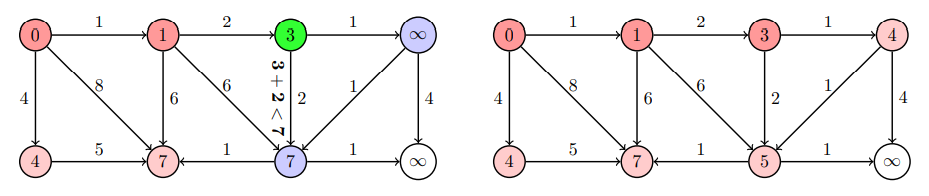

**<u>ITERATION 4:</u>** Nodes $D$ and $E$ both have the minimum distance of 4, so the first-in node out of the two is returned from the priority queue. Therefore, next current node is node $E$ with distance $4$. <br>
The distances of neighbouring nodes of $E$ are to be updated as $4 + pathlength$. <br><br>
**But here, node $F$ is NOT updated** - because the new value of distance $4 + 5 = 9$ is **greater than** its existing value of distance $7$. <br> <br>
With this, node $E$ moves to "COMPLETED" pile, and no nodes are updated.

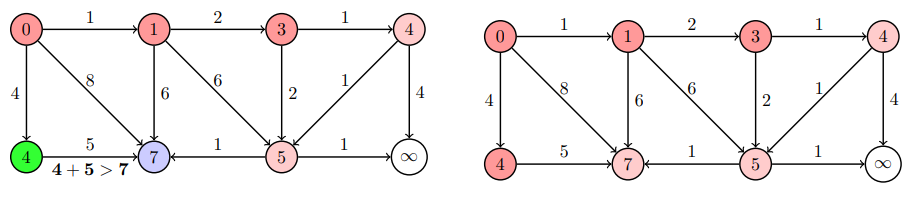

**<u>ITERATION 5:</u>** Now, the next current node is node $D$ with the same distance $4$. <br>
The distances of neighbouring nodes of $D$ are to be updated as $4 + pathlength$. <br><br>
**But here, node $G$ is NOT updated** - because the new value of distance $4 + 1 = 5$ is **equal to** its existing value of distance $5$. <br> <br>
With this, node $D$ moves to "COMPLETED" pile, and node $H$ alone is updated for the first time.

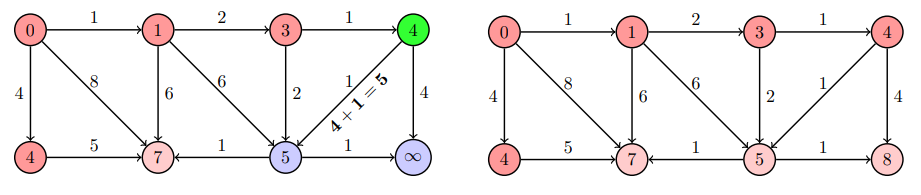

**<u>ITERATION 6:</u>** Next current node coming from the priority queue is node $G$ with distance $5$. <br>
The distances of neighbouring nodes of $G$ are to be updated as $5 + pathlength$. <br><br>
**Nodes $F$ and $H$ are both updated** - because the new values of distance $5 + 1 = 6$ are **lesser than** their existing values of distance $7$ and $8$ respectively. <br> <br>
With this, node $G$ moves to "COMPLETED" pile, and nodes $F, H$ are updated.

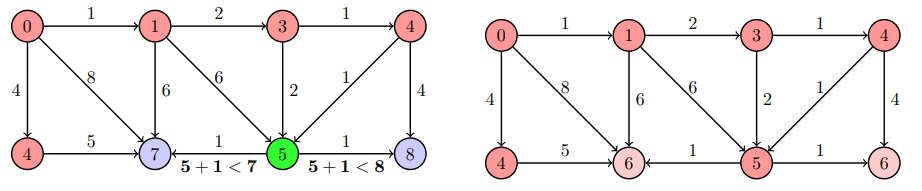

**<u>ITERATION 7:</u>** Now the only nodes which are not "COMPLETED" are $F$ and $H$. Both of them have the same value of distance, and both were introduced into the priority queue at the same time. Therefore, either one can be the next current node. <br> 
Let $F$ be our next current node.
The distances of neighbouring nodes of $F$ are to be updated as $6 + pathlength$. <br><br>
However, there are no neighbouring nodes of $F$, so nothing changes. <br> <br>
With this, node $F$ moves to "COMPLETED" pile, and no nodes are updated.

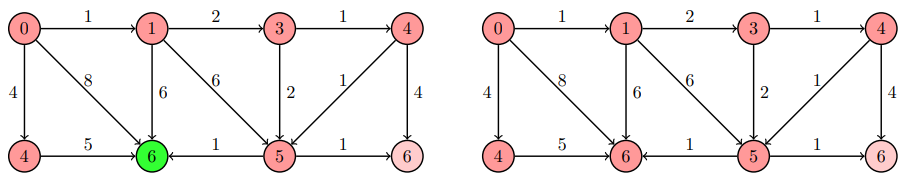

**<u>ITERATION 8:</u>** The final node selected as our current node is node $H$.
The distances of neighbouring nodes of $H$ are to be updated as $6 + pathlength$. <br><br>
However, there are no neighbouring nodes of $H$, so nothing changes. <br> <br>
With this, node $H$ moves to "COMPLETED" pile, and **we are done with Dijkstra's algorithm.**

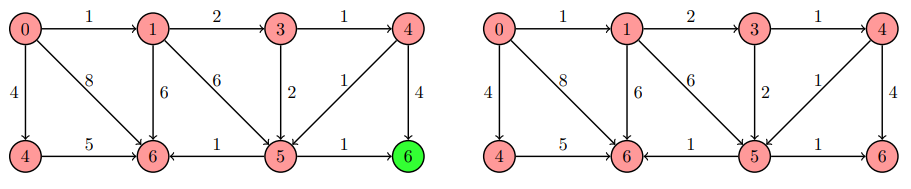

______________________________________________

**(a) The intermediate distance values at each iteration are represented below in table form.**

<div> 
<table>
    <tr>
        <th>Iteration No.\Node</th>
        <th>A</th>
        <th>B</th>
        <th>C</th> 
        <th>D</th>
        <th>E</th>
        <th>F</th>
        <th>G</th>
        <th>H</th>
    </tr>
    <tr>
        <th>INITIAL</th>
        <td>0</td>
        <td>inf</td>
        <td>inf</td>
        <td>inf</td>
        <td>inf</td>
        <td>inf</td>
        <td>inf</td>
        <td>inf</td>
    </tr>
    <tr>
        <th>1</th>
        <td>0</td>
        <td>1</td>
        <td>inf</td>
        <td>inf</td>
        <td>4</td>
        <td>8</td>
        <td>inf</td>
        <td>inf</td>
    </tr>
    <tr>
        <th>2</th>
        <td>0</td>
        <td>1</td>
        <td>3</td>
        <td>inf</td>
        <td>4</td>
        <td>7</td>
        <td>7</td>
        <td>inf</td>
    </tr>
    <tr>
        <th>3</th>
        <td>0</td>
        <td>1</td>
        <td>3</td>
        <td>4</td>
        <td>4</td>
        <td>7</td>
        <td>5</td>
        <td>inf</td>
    </tr>
    <tr>
        <th>4</th>
        <td>0</td>
        <td>1</td>
        <td>3</td>
        <td>4</td>
        <td>4</td>
        <td>7</td>
        <td>5</td>
        <td>inf</td>
    </tr>
    <tr>
        <th>5</th>
        <td>0</td>
        <td>1</td>
        <td>3</td>
        <td>4</td>
        <td>4</td>
        <td>7</td>
        <td>5</td>
        <td>8</td>
    </tr>
    <tr>
        <th>6</th>
        <td>0</td>
        <td>1</td>
        <td>3</td>
        <td>4</td>
        <td>4</td>
        <td>6</td>
        <td>5</td>
        <td>6</td>
    </tr>
    <tr>
        <th>7</th>
        <td>0</td>
        <td>1</td>
        <td>3</td>
        <td>4</td>
        <td>4</td>
        <td>6</td>
        <td>5</td>
        <td>6</td>
    </tr>
    <tr>
        <th>8</th>
        <td>0</td>
        <td>1</td>
        <td>3</td>
        <td>4</td>
        <td>4</td>
        <td>6</td>
        <td>5</td>
        <td>6</td>
    </tr>
</table>
</div>
<br>
____________________________________________________________________________________________________________________________________________________________

**(b) The final shortest-path tree is shown below.** <br><br> It is constructed by taking the Dijkstra-applied graph and, for every node $n$, connecting it only to one parent $p_n$ such that $dist(p_n)+ dist(edge_{p_n, n}) = dist(n)$. In other words, we preserve only those edges that lead to the shortest path to every node.
<br><br>
In case there are multiple parents to a node $n$ which give the same minimum value of distance to the node that we require, the tie is broken by selecting the parent which leads to the route with **fewest edges traversed** from root (starting node) to the node $n$.

In our graph, such a tie emerges for selecting the parent of node $G$. Both $C$ and $D$ satisfy $dist(p_n)+ dist(edge_{p_n, n}) = dist(n)$, but node $C$ is selected as it gives a 3-edge path from $A$ to $G$, versus node $D$ which gives a 4-edge path.


> 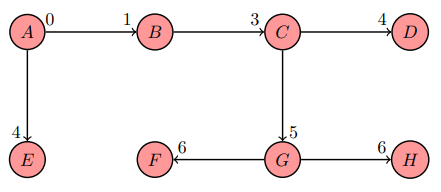

_______________________________________________________________________________________________________________

## **Question 7**

$(i)$ Congestion control is used to prevent congestive collapse of a network, which is the point where further loading the network actually causes the amount of traffic forwarded to decrease. 

Collapse can occur due to spurious retransmission of packets - when senders don't receive timely acknowledgements for transmitted packets, they tend to spuriously retransmit them, leading to many copies of the same packet in flight. Collapse can also occur due to undelivered packets, where packets take up bandwidth to be transmitted but they are dropped in the middle - not reaching the receiver. Congestion control prevents both of these problems from occurring. CUBIC TCP and Compound TCP are two algorithms that implement congestion control.

In general, the congestion window/ the maximum number of packets allowed to be in flight, is a measure of congestion in the network. Congestion control is implemented by manipulation of the congestion window depending on the current state of congestion in the network.
<br><br>
$(a)$ **CUBIC TCP**
- CUBIC TCP uses a cubic function of the time elapsed since the last congestion event, to control the size of the congestion window. It is therefore independent of round-trip time (RTT) of the flows, and does not favour faster flows over slower ones - increasing fairness.

- The inflection point of the cubic function is at the window size prior to the congestion event. Therefore, the left side of this inflection point indicates that rapid concave growth in the congestion window size occurs upon reduction, until it reaches the last window size prior to congestion.

- The right side of this inflection point indicates initially slow convex probing of the bandwidth immediately after the last pre-congestion window size has been reached. This slow increase allows the network to stabilise before it starts fast probing of the available bandwidth.

- This fast probing allows optimisation for Long Fat Networks with large bandwidth-delay products.

- Since the cubic function is smooth and there is a fast recovery to the last pre-congestion window size, CUBIC TCP is less aggressive.

- Considering the following notation:

 $\beta$:     Multiplicative decrease factor<br>
 $w_{max}$:   Window size just before the last reduction<br>
 $T$:     Time elapsed since the last window reduction<br>
 $C$:     A Scaling constant<br>
 $cwnd$:  The congestion window size at the current time <br>

 We have the following model for the congestion window in CUBIC TCP:




$(b)$ **Compound TCP**
- Compound TCP is a more aggressive algorithm introduced by Microsoft that optimises for large bandwidth-delay products, trying to preserve fairness simultaneously.
- Compound TCP is so called because it combines two different approaches or measures of congestion.
- Similar to TCP Vegas, it uses a queueing-delay-based window, but it also uses a regular Additive-Increase-Multiplicative-Decrease (AIMD) window similar to TCP Reno.
- The actual sending window is the sum of these two windows.
- If the delay is small, the delay-based window grows rapidly towards maximum utilisation, but once queueing begins, it decreases gradually to accommodate for increase in the AIMD window.
- The decrease in delay-based window aims to compensate exactly for the increase in the AIMD window, in order to keep the actual sending window (the sum) at a constant value - the bandwidth-delay product.
- The [Microsoft patent](https://patentimages.storage.googleapis.com/3a/a3/0d/468a734005c8c1/US7577097.pdf) of Compound TCP describes more mathematical details:

 - The actual sending window size $win$ is given by:
 \begin{align}
    win=min(awnd, cwnd+dwnd)
 \end{align}
 where $cwnd : $ AIMD congestion window size <br>
 $dwnd : $ delay-based window size <br>
 $awnd : $  maximum number of packets allowance window

 - The congestion window is updated as:
 \begin{align}
    cwnd=cwnd +\frac{1}{cwnd+dwnd}
 \end{align}
 - and the delay-based window is updated as:
 \begin{align}
    dwnd(t+1)=\left\{
     \begin{array}{lr}
       dwnd(t) + \alpha\cdot dwnd^k(t) & : diff < \gamma\\
       dwnd(t) - diff & : diff \geq \gamma \\
       dwnd(t)/2 & : packet loss
     \end{array}
   \right.
 \end{align}

   where: <br>
   $diff = (expect - actual)\times baseRTT$
   [with $expect = \frac{dwnd}{baseRTT}, actual = \frac{dwnd}{RTT}$] : estimate of number of packets backlogged at the bottleneck
   <br>
   $\alpha : $ step-size <br>
   $k :$ parameter that controls aggressiveness of increasing $dwnd$ <br>
   $\gamma :$ threshold for the value of $diff$


**Similarities:**
- Both algorithms help to optimise networks with large bandwidth-delay products.
- Both algorithms try to improve fairness of the TCP resource allocation.
- Both algorithms have been implemented in large scale systems and networks.

**Differences:**
<div>
<table>
    <tr>
        <th>CUBIC TCP</th>
        <th>Compound TCP</th>
    </tr>
    <tr>
        <td>Since the $cwnd$ is controlled by a cubic function of real time <br> since the last congestion, it is independent of $RTT$.</td>
        <td>The $diff$ parameter is recalculated at the end of every round, <br> therefore Compound TCP depends on RTT and Acknowledgements. </td>
    </tr>
    <tr>
        <td>Less aggressive and more systematic algorithm.</td>
        <td>More aggressive algorithm.</td>
    </tr>
    <tr>
        <td>The window size depends on time elapsed since last congestion.</td>
        <td>The window size depends on previous window sizes and estimated <br> number of backlogged packets.</td>
    </tr>
</table>
</div>

____________________________________________________

$(ii)$
A TCP with high fairness will try to ensure equal allocation of resources to all the TCP flows. In other words, a new protocol should receive no larger share of netwok resources than a comparable TCP flow. Fairness of TCP is set as a goal for network algorithms, since ensuring fairness prevents congestion collapse.

There are numerous metrics in existence to evaluate the fairness of a TCP. For a large-scale network, like the Internet, **Jain's fairness index** is a great metric of fairness. Jain's fairness index has the property of population size independence - which means it is applicable to any number of flows (even as large as in the Internet).

The Jain's fairness index is given by:
\begin{align}
    I = \frac{(\sum_{i=1}^n T_i)^2}{n\sum_{i=1}^n T_i^2}
\end{align}
where <br>
$n:$ number of flows <br>
$T_i:$ measured throughput of/bandwidth allocation to the $i$th flow

When the Jain's fairness index is 1, it implies highest fairness, and a value of 0 implies lowest fairness.

There exist other metrics of fairness such as Max-Min fairness and QoE fairness as well.

_____________________________________________________________________________________________

$(iii)$ We have discussed how Cubic TCP uses real-time information to determine congestion and determine the window size, while Compound TCP uses RTTs and Acknowledgements to do the same. To design a congestion control algorithm that would do better than both, I would take a somewhat hybrid approach - one which uses both real-time bottleneck bandwidth information and RTT information to determine congestion.

Packet-loss based algorithms (such as CUBIC TCP) give delayed information about congestion occurring, because of the phenomenon known as buffer float. Therefore, understanding that packet loss alone isn't an accurate measurement of congestion and using real time bottleneck bandwidth and RTT information to determine congestion, will help to design a better algorithm.

____________________________________________________________________

## **Question 8**

$(i)$
- The PageRank algorithm is a function that assigns a real number (the PageRank) to each page on the Web that has been discovered by Google.
- At a point when search engines worked by returning those pages which had more frequent and significant occurrences of the search terms, the need for PageRank came from those who exploited the earlier behaviour of search engines using *term spam* - essentially anyone could spam a popular search term on any page, and have their page show up at the top.
- PageRank was an innovative way to decide the importance of a page using the number of links that led to and from pages. The idea was to simulate random web surfers starting at random webpages, and those webpages where the random surfers tended to congregate were marked as important.
- Even if a spammer generated millions of pages with links to their page, these millions of pages would not have lots of links leading to them and they would not get a high PageRank. Therefore, it becomes harder for a spammer to exploit search engines.

The algorithm is as follows:

- In a nutshell, the Web will be modeled as Markov process and the limiting distribution will be calculated, to figure out the congregative behaviour of random surfers.
- Consider the Web to be a directed graph where nodes are webpages, and there exists a directed edge from node $n_1$ to node $n_2$ if there are one more links leading from $n_1$ to $n_2$.
- We begin by considering a simulated random surfer of the Web, who begins at any page with equal probability. Therefore, the vector of initial probabilities is the unifomrly distributed vector, given by:
\begin{align}
    \mathbf{v_0} = [ 1/N \hspace{7pt} 1/N ... 1/N ]
\end{align}
where N is the number of nodes in the graph.
- We can then define the **transition probability matrix $P$** of the Web to describe where the surfers go after on step, and with what probabilities. The element $p_{ij}$ in row $i$ and column $j$ of the matrix represents the probability of going from page $j$ to page $i$. (This notion of the transition probability matrix is the transposed version of the conventional description.)
- We will assume that the probability of going to every page $i$ that has a link from page $j$ is equal. Therefore, 
\begin{align}
    p_{ij}=\left\{
     \begin{array}{lr}
       1/k & : \text{there exists a link from $j$ to $i$}\\
       0  & : \text{otherwise}
     \end{array}
   \right.
 \end{align}
 where $k$ is the number of links going out from page $j$.
- We have the following:
\begin{align}
    \mathbf{v_1} & = P\mathbf{v_0} \\
    \mathbf{v_2} & = P\mathbf{v_1} \\
    & = P^2\mathbf{v_0}\\
    \vdots \\
    \mathbf{v_n} & = P^n\mathbf{v_0} \\
\end{align}
owing to the Markov model of the Web that we have assumed.
- Since we want to reach the limiting probability vector of the surfer, one way of doing so is to left-multiply the initial vector repeatedly by $P$ until the values of the vector do not change much. That is,
\begin{align}
    \mathbf{v_{n+1}} & = P\mathbf{v_{n}} \approx \mathbf{v_{n}}\\
\end{align}
The vector $\mathbf{v_n}$ is the principal eigenvector of the matrix $P$, with eigenvalue $1$. However, in practice, solving $\mathbf{v} = P\mathbf{v}$ is hard, considering the huge size of the Web. Therefore, the iterative method of left-multiplying the initial vector by $P$ until we converge to a limimt within a threshold is followed. In practice, the vector converges after about 50-75 iterations of multiplication.


This model would suffice if the Web were strongly connected/irreducible (it is possible to get to any page from any other page) and if there were no dead end nodes with no arcs out. However, since the Web does not satisfy both these conditions, a few modifications are adopted.

- If we use the same model as above with deadends, the PageRank vector eventually converges to 1 for the deadends and 0 for all other pages, which would be inaccurate.
- Another problem similar to deadends is *spider traps*, which are groups of pages that all have outlinks to each other, but no links to any other pages. Any surfer who enters a spider trap cannot exit it.
- Both these problems are solved by a concept called **taxation**.
- The taxation concept introduces a modification to the update rule of the vector $\mathbf{v}$. This modified iterative step of calculating $\mathbf{v_{n+1}}$ from $\mathbf{v_n}$ is:
\begin{align}
    \mathbf{v_{n+1}} & = \beta P\mathbf{v_n} + \frac{(1-\beta)}{N}\mathbf{e} \\
\end{align}
where: \\
$N:$ number of nodes in the graph \\
$\beta:$ a constant, usually in the range $0.8 - 0.9$ \\
$\mathbf{e}: $ vector of all $1$s

- This modification means that a surfer will take an outlink from the current page with probability $\beta$ (referring to the $\beta Pv$ term which represents the usual Markov transition behaviour), and will get reset to a uniformly random page on the Web with probability $1-\beta$ (referring to the $\frac{(1-\beta)}{N}\mathbf{e}$ term).
- This modification provides an outlet for surfers to leave deadends and spider traps, thus preventing importance of pages from draining out of the Web and aggregating at deadends. This allows us to arrive at a valid estimate of the importance of pages despite deadends and spider traps.

_________________________________________________________________________________________________________________________________________________



$(ii)$
The YouTube algorithm is one which uses many factors in the ranking of videos for its search results. Some of the key factors are described below:
- **Relevance of the video:** How the search terms match with the title, tags, descriptions, transcriptions of the video itself.
- **Engagement with the audience:** There are many metrics that determine engagement of a video:
 - Impression Click Through Rate (CTR) which is the percentage of audience who click the video when shown as a recommendation or search result.
 - Average view duration which measures audience retention. This is one of the most important metrics, because YouTube will rank videos that keep viewers interested very highly.
 - How many viewers watch all the way to the end
 - Total Watch Time (product of the first two factors)
 - Number of likes, dislikes and comments on the video
 - Number of people that click on the video from the Recommended Videos section
 
 Apart from this, the distinction between a subscriber and a non-subscriber is stark. If a non-subscriber to the channel leaves a like or a comment on a video, its ranking improves largely. If a non-subscriber clicks on the video from another video through the Recommended Section, the ranking improves largely. Conversely, if a subscriber clicks on a different video, ignoring our video, its ranking drops.

 These metrics are given importance because they measure the ability of a video to grab the attention of and entertain someone who has never viewed a particular channel or their content.

All in all, the YouTube algorithm is one which gives space new channels to grow (by making audience retention a huge factor which depends on the video, even compared to watch time which is a metric that bigger channels will dominate). Also, the performance of one video from a certain channel can vary drastically from the performance of another video from the same channel, because of the nature of the algorithm.

 ________________________________________________________________________________________________________________


$(iii)$ I might include the following factors in a framework of my own:
- Some channels may make videos that are longer and others shorter. Some channel which makes 1-minute videos may have better content than some others which are 6 minutes long. This means that average view duration is probably not the best metric to push the best videos. What I would substitute it with is the **average percentage of video viewed** instead of the absolute average view duration.
- I would focus on the **like-dislike ratio**. A high ratio will lead to better ranking of a video. A low ratio, irrespective of whether the number of dislikes is very high, would not do well. This would be done to promote positive engagement vs. any kind of engagement (because negative engagement may cause unrest and lead to loss of viewership in the long run).
- I would implement a speech-to-text converter (subtitle generator) for the videos which do not have subtitles, and **include the words uttered in the video in the search keywords** as well. This would allow more engagement for videos that have good content, but probably not a great title or tags.

________________________________________________________________________________________________________________
